In [ ]:
!pip install --upgrade ultralytics ray


image 1/1 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\test\images\green_01720.jpg: 640x640 2 greens, 5.1ms
Speed: 3.0ms preprocess, 5.1ms inference, 47.3ms postprocess per image at shape (1, 3, 640, 640)


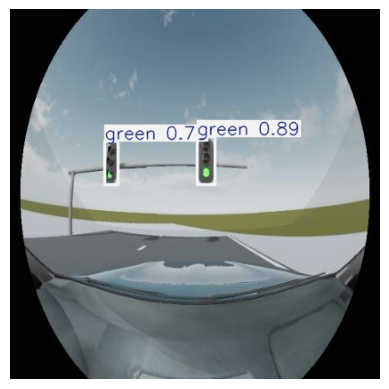

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# 학습된 YOLOv5 모델 로드
model_path = 'runs/detect/train/weights/best.pt'  # 학습된 가중치 파일 경로
model = YOLO(model_path)

# 테스트 이미지 경로
Image_dir = os.getcwd() + '/data/test/images'
test_image = os.path.join(Image_dir, 'green_01720.jpg')

# 객체 탐지 수행
results = model.predict(source=test_image)

# 개별 결과 처리 및 시각화
for result in results:  # results는 리스트로 반환됨
    # 탐지된 객체를 시각화한 이미지를 가져옵니다
    plotted_image = result.plot()  # 탐지 결과가 그려진 numpy 배열 반환

    # Matplotlib로 이미지 표시
    plt.imshow(cv2.cvtColor(plotted_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [2]:
from ultralytics import YOLO
import os

# 학습된 YOLOv5 모델 로드
model_path = 'runs/detect/train/weights/best.pt'  # 학습된 가중치 파일 경로
model = YOLO(model_path)

# 테스트 데이터 경로 및 결과 저장 경로
test_data_path = os.getcwd() + '/data/test/images'  # 테스트 데이터 경로
save_dir = 'runs/detect/test_results'  # 탐지 결과 저장 디렉터리

# 테스트 데이터에 대해 탐지 수행 및 결과 저장
results = model.predict(source=test_data_path, save=True, save_dir=save_dir)

# 정확도 평가 (mAP 계산)
metrics = model.val(data=os.getcwd() + '/data/data.yaml')  # data.yaml 경로 지정

# 평가 결과 출력 (DetMetrics 객체의 속성 사용 - 평균 계산)
precision = metrics.box.p.mean()  # Precision 평균
recall = metrics.box.r.mean()     # Recall 평균
map50 = metrics.box.map50         # mAP@50 (이미 평균값 반환됨)
map50_95 = metrics.box.map        # mAP@50-95 (이미 평균값 반환됨)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"mAP@50: {map50:.2f}")
print(f"mAP@50-95: {map50_95:.2f}")

print(f"Results saved to: {save_dir}")



image 1/690 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\test\images\40_sign_00039.jpg: 640x640 1 40_sign, 6.1ms
image 2/690 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\test\images\40_sign_00045.jpg: 640x640 1 40_sign, 7.0ms
image 3/690 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\test\images\40_sign_00167.jpg: 640x640 1 40_sign, 5.0ms
image 4/690 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\test\images\40_sign_00169.jpg: 640x640 1 40_sign, 6.1ms
image 5/690 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\test\images\40_sign_00175.jpg: 640x640 1 40_sign, 6.5ms
image 6/690 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\test\images\40_sign_00200.jpg: 640x640 1 40_sign, 6.0ms
image 7/690 C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\test\images\40_sign_00203.jpg: 64

val: Scanning C:\Users\limul\Desktop\College\2_grade\2_semester\AI_Project\teamProject\data\valid\lab
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████


                   all        679       1003      0.949      0.904      0.937      0.805
                   red        111        177      0.939       0.78      0.857      0.677
                yellow        103        138      0.918      0.895       0.91      0.784
                 green        109        154      0.966      0.851      0.894      0.705
             stop_sign         68         68      0.974      0.956      0.981      0.911
               40_sign         54         54      0.962      0.942      0.979      0.874
               80_sign         71         71       0.97      0.916      0.936      0.832
            start_sign          5          5       0.92          1      0.995      0.856
                person        194        336      0.944      0.895      0.942      0.799
Speed: 0.3ms preprocess, 5.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val
Precision: 0.95
Recall: 0.90
mAP@50: 0.94
mAP@50-95: 0.80
Results saved to: runs/det

In [ ]:
from ultralytics import YOLO
import cv2

# 학습된 YOLOv5 모델 로드
model_path = 'runs/detect/train/weights/best.pt'  # 학습된 가중치 파일 경로
model = YOLO(model_path)

# 웹캠 초기화
cap = cv2.VideoCapture(0)  # 0은 기본 웹캠. 외부 카메라는 다른 번호로 변경

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

# 웹캠 프레임 처리
while True:
    ret, frame = cap.read()
    if not ret:
        print("웹캠에서 프레임을 읽을 수 없습니다.")
        breakㅈ

    # YOLO 모델을 사용해 객체 탐지 수행
    results = model.predict(source=frame, save=False, conf=0.5)  # conf는 신뢰도 임계값

    # 결과 이미지 얻기
    annotated_frame = results[0].plot()  # 탐지 결과가 그려진 numpy 배열 반환

    # OpenCV 창에 결과 표시
    cv2.imshow("YOLOv5 Real-Time Detection", annotated_frame)

    # ESC 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == 27:  # ESC 키
        break

# 리소스 해제
cap.release()
cv2.destroyAllWindows()



0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 6.4ms
Speed: 1.0ms preprocess, 6.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.2ms
Speed: 1.0ms preprocess, 7.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 yellow, 7.1ms
Speed: 1.0ms preprocess, 7.1ms inference, 1.0ms postpro